In [18]:
import pandas as pd
from joblib import load
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

In [23]:
def make_plot(model, X, y, name_fig):
    _, axis = plt.subplots(1,3, figsize=(13,6))

    PrecisionRecallDisplay.from_estimator(
        model,
        X,
        y,
        ax=axis[0]
    )

    RocCurveDisplay.from_estimator(
        model,
        X,
        y,
        ax=axis[1]
    )

    ConfusionMatrixDisplay.from_estimator(
        model,
        X,
        y,
        ax=axis[2],
        cmap="Blues",
        normalize="true"
    )

    plt.tight_layout()
    plt.savefig(name_fig, dpi=300)

In [17]:
test_data = pd.read_csv("my_test_data.csv")
X = test_data.drop(columns=["label"]).values
y = test_data["label"].values

In [30]:
list_models = os.listdir("models/")
list_models

['SVC_False',
 'hist_model_False',
 'RF_model_True',
 'hist_model_True',
 'LR_True',
 'SVC_True',
 'RF_model_False',
 'LR_False']

SVC_False
hist_model_False
RF_model_True
hist_model_True
LR_True
SVC_True
RF_model_False
LR_False


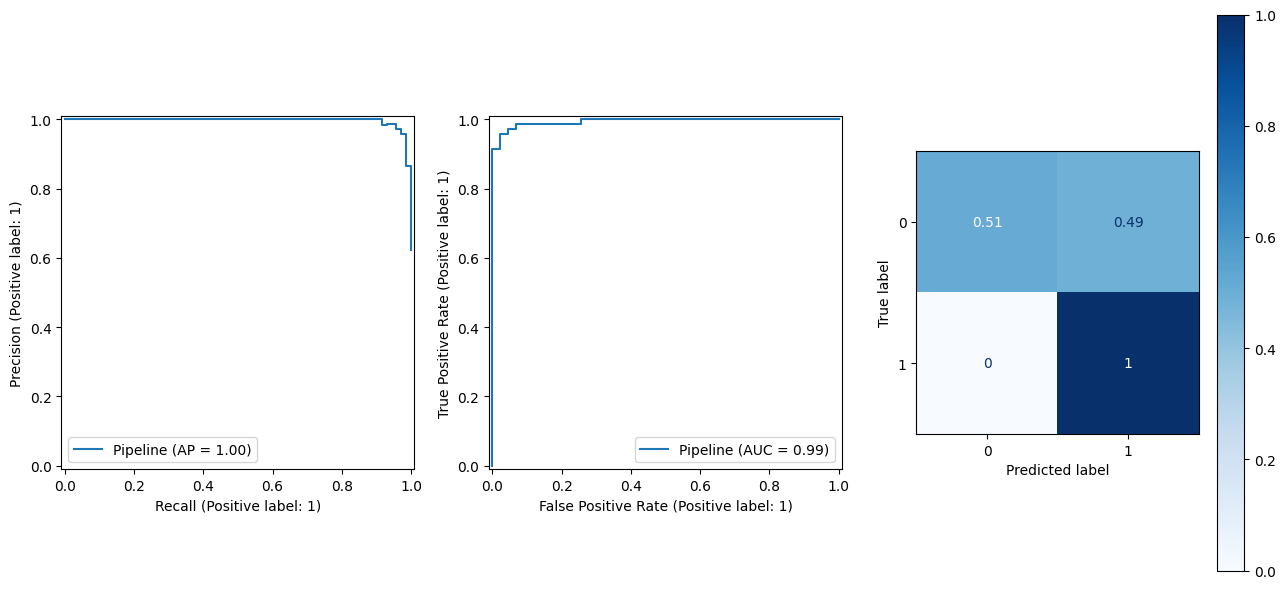

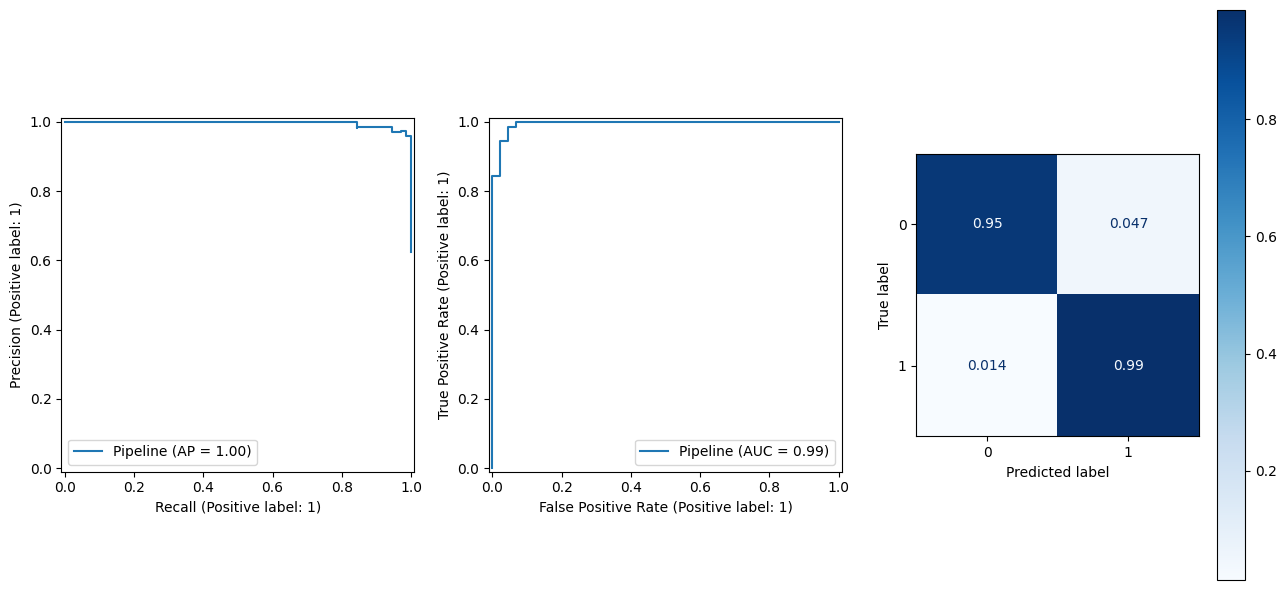

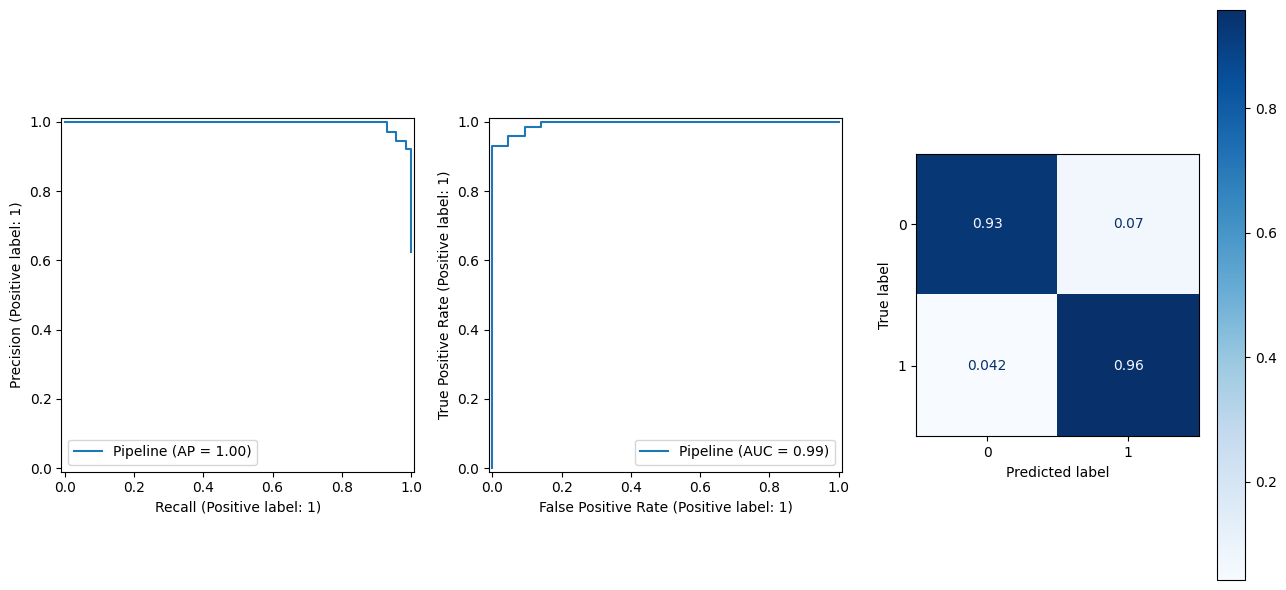

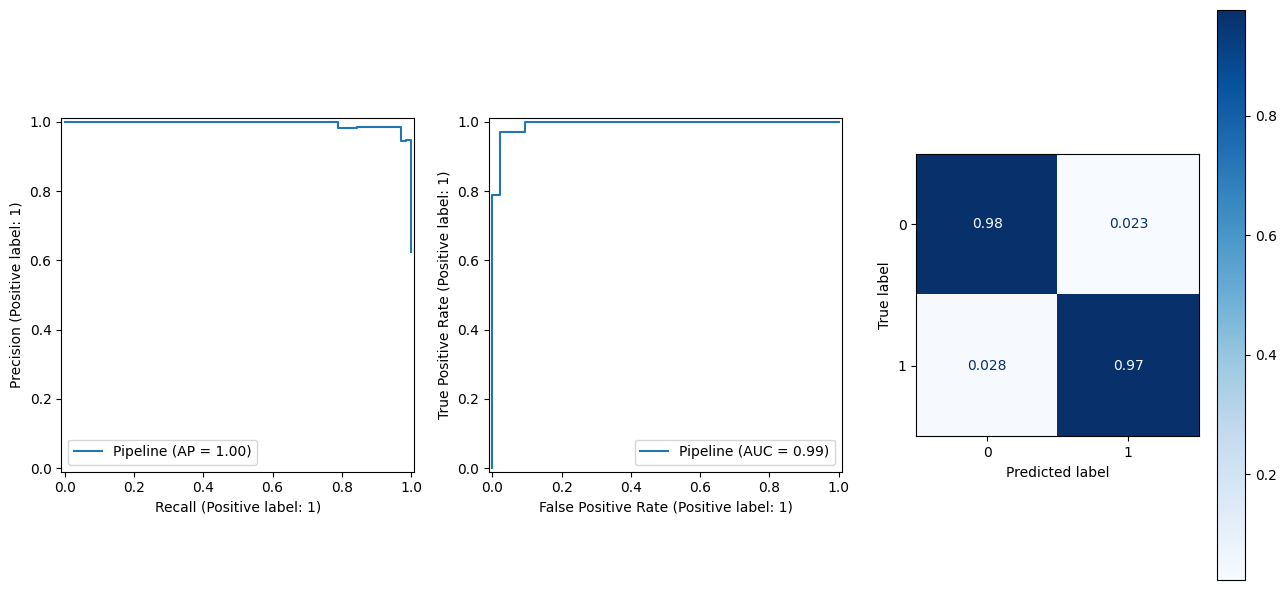

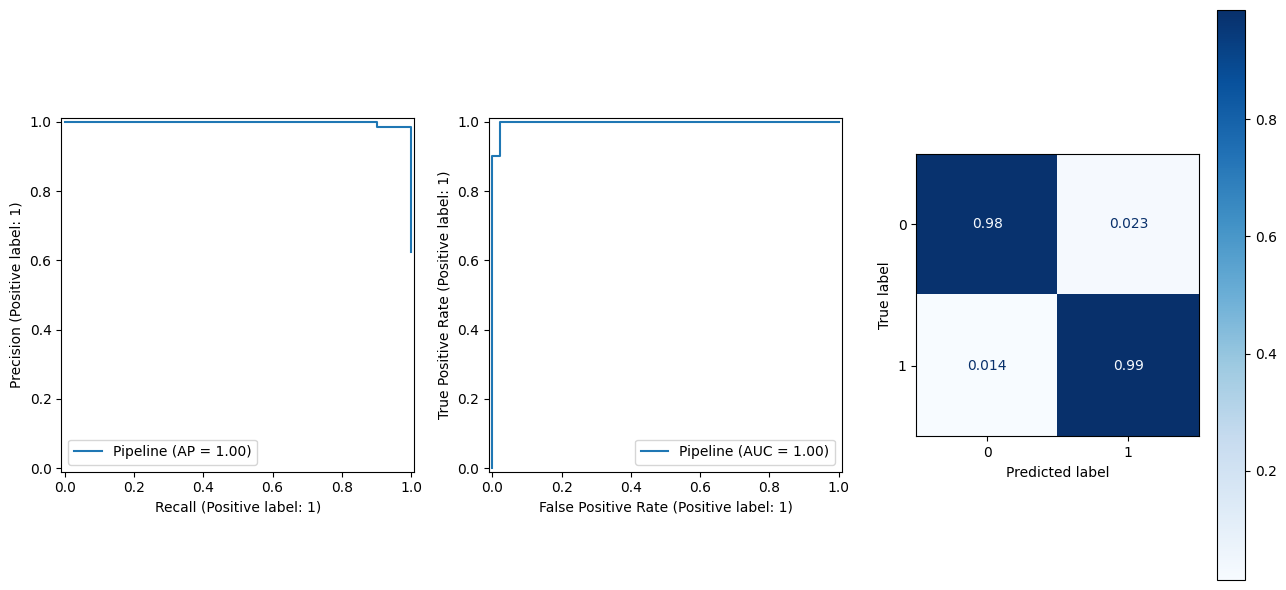

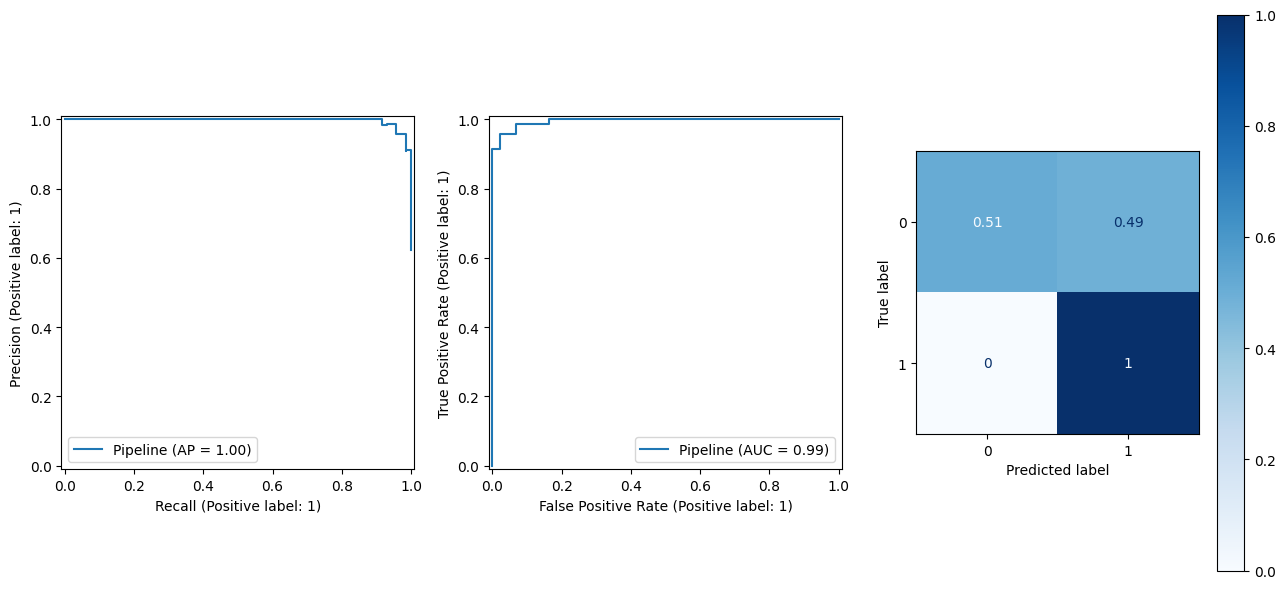

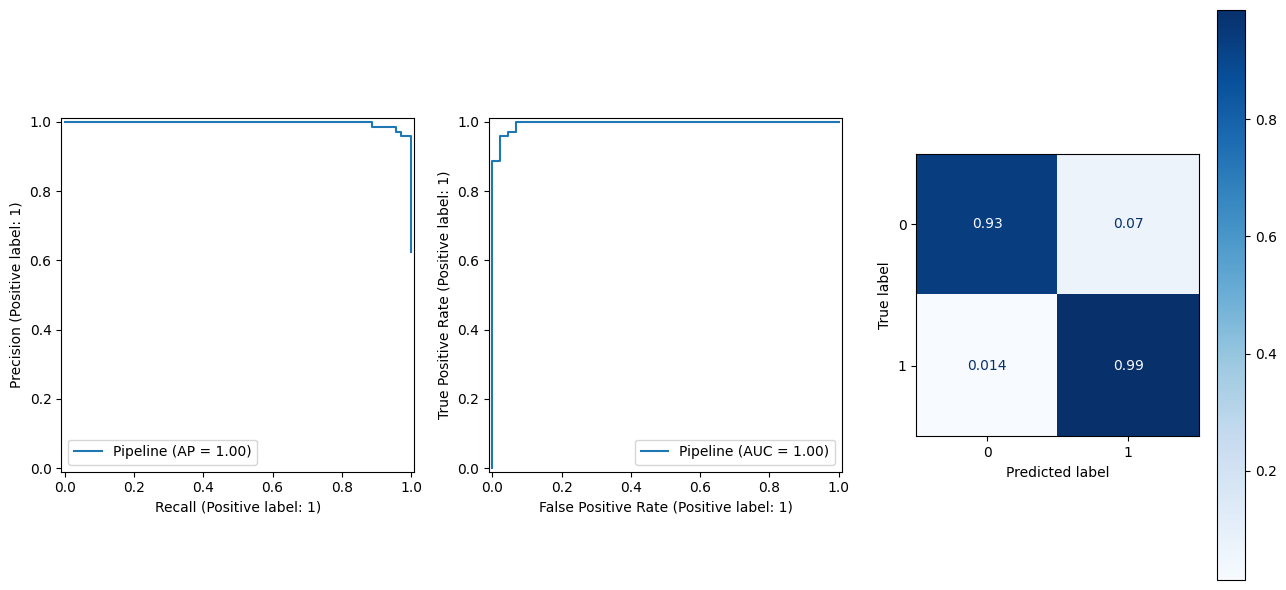

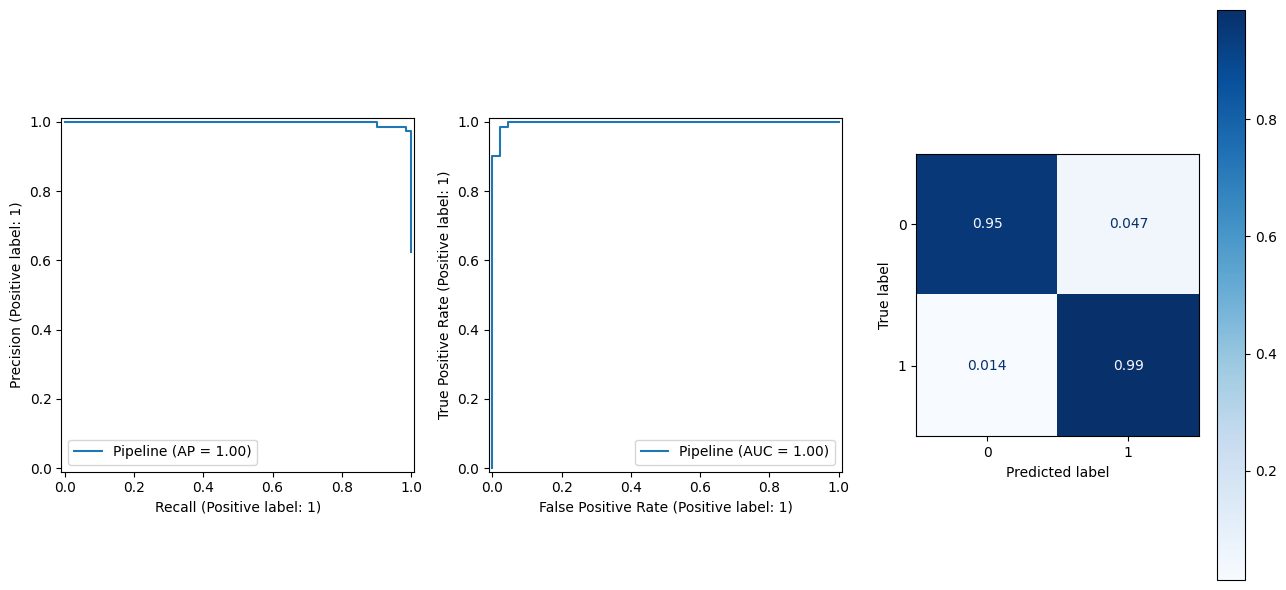

In [31]:
list_load_models = []
for model in list_models:
    print(model)
    my_model = load(f"models/{model}/my_model.joblib")
    if "SVC" not in model:
        list_load_models.append(my_model)

    make_plot(my_model, X, y, f"models/{model}/summary_model.png")


- Combinar modelos

In [38]:
predicted_labels = pd.DataFrame()

for index, model in enumerate(list_load_models):
    predicted_labels[f"model_{index}"] = model.predict(X)

predicted_labels["y_true"] = y

In [39]:
predicted_labels.to_csv("tmp.csv", index=False)

In [46]:
model.predict_proba(X)

array([[1.13590250e-01, 8.86409750e-01],
       [9.99990991e-01, 9.00936206e-06],
       [9.96920905e-01, 3.07909541e-03],
       [5.10134225e-04, 9.99489866e-01],
       [6.06389713e-05, 9.99939361e-01],
       [1.00000000e+00, 9.48087773e-11],
       [9.99999998e-01, 1.53672648e-09],
       [9.65096937e-01, 3.49030633e-02],
       [3.79342140e-01, 6.20657860e-01],
       [7.59402734e-04, 9.99240597e-01],
       [4.98717826e-02, 9.50128217e-01],
       [9.87592879e-01, 1.24071210e-02],
       [6.07381873e-03, 9.93926181e-01],
       [8.56069117e-01, 1.43930883e-01],
       [1.62175599e-03, 9.98378244e-01],
       [9.99259818e-01, 7.40182295e-04],
       [1.85245908e-03, 9.98147541e-01],
       [1.11662359e-05, 9.99988834e-01],
       [8.18375684e-07, 9.99999182e-01],
       [9.99998883e-01, 1.11701472e-06],
       [8.41633901e-02, 9.15836610e-01],
       [9.74778299e-03, 9.90252217e-01],
       [9.99999996e-01, 4.33732393e-09],
       [7.89186669e-05, 9.99921081e-01],
       [1.138743